# PROYECTO FINAL - 2024

* Instituto Superior Politécnico Córdoba.
* Grupo nº 2.
* Álvarez, Agustin.   
* Boero, Aldana.   
* Octtinger, Martina. 
* Vila, Mariano.


## Reconocimiento de emociones a partir de imágenes faciales

## INFORMACIÓN DEL DATASET

El dataset FER-2013 (Facial Expression Recognition 2013) es un conjunto de datos utilizado ampliamente en la investigación sobre el reconocimiento de emociones a partir de imágenes faciales.

Origen:

El dataset FER-2013 fue introducido en la competencia "Challenges in Representation Learning: Facial Expression Recognition Challenge" durante la conferencia International Conference on Machine Learning (ICML) en 2013.
Las imágenes fueron recolectadas de una búsqueda en Google Image Search y etiquetadas automáticamente usando el API de la plataforma de crowdsourcing Amazon Mechanical Turk.  
Cantidad de Imágenes:

Cuenta con un total de 35,887 imágenes en escala de grises.
Las imágenes están divididas en tres subconjuntos:
Entrenamiento (Training): 28,709 imágenes.
Validación (PublicTest): 3,589 imágenes.
Prueba (PrivateTest): 3,589 imágenes.  
Resolución:

Todas las imágenes en el dataset tienen una resolución de 48x48 píxeles.  
Etiquetas de Emociones:

Las imágenes están etiquetadas con una de las siguientes siete categorías de emociones:
0: Enfado (Angry)
1: Disgusto (Disgust)
2: Miedo (Fear)
3: Felicidad (Happy)
4: Tristeza (Sad)
5: Sorpresa (Surprise)
6: Neutral (Neutral)

## IMPORTAR LIBRERIAS

In [56]:
# Importar librerías necesarias
import numpy as np  # Manipulación de arrays
import pandas as pd  # Manipulación de datos
import matplotlib.pyplot as plt  # Crear gráficos
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import math
import cv2  # Procesamiento de imágenes
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import keras
from tensorflow.keras.applications import VGG19
from keras import layers
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D,GlobalAveragePooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Sequential, Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from tensorflow.python.keras.utils import layer_utils, np_utils
from tensorflow.python.keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam
from keras import losses
from tensorflow.python.keras import backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0, ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
# https://www.kaggle.com/datasets/deadskull7/fer2013

# 1) COMPRENSION DEL NEGOCIO

Paso 1: Comprensión del Negocio.  
El objetivo es clasificar imágenes de caras en siete categorías de emociones: 'Enojado', 'Disgustado', 'Asustado', 'Feliz', 'Neutral', 'Triste' y 'Sorprendido'.

# 2) COMPRENSIÓN DE LOS DATOS

Resumen detectado en la exploración:
* El dataset cuenta con 35887 entradas.
* Todas las imágenes tienen una resolución de 48x48 píxeles.
* No se observan campos nulos en el dataset.
* El tipo de emociones son 7. El valor de cada categoría va en el rango de 0 a 6.
* Se aprecia en los datos, que la categoría 1 (disgusto) tiene baja cantidad de muestras en relación al resto.
* Las categorías en el dataset FER-2013 generalmente se etiquetan con los siguientes números y sus respectivas emociones:
* 0 - Enojo (Angry).  
* 1 - Disgusto (Disgust).  
* 2 - (Fear).  
* 3 - Felicidad (Happy).           
* 4 - Tristeza (Sad).
* 5 - Sorpresa (Surprise).
* 6 - Neutral.

In [30]:
df=pd.read_csv('fer2013.csv')
print(df.head())
print()
print(df.groupby('emotion').count())
print()
print(df.groupby('Usage').count())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

         pixels  Usage
emotion               
0          4953   4953
1           547    547
2          5121   5121
3          8989   8989
4          6077   6077
5          4002   4002
6          6198   6198

             emotion  pixels
Usage                       
PrivateTest     3589    3589
PublicTest      3589    3589
Training       28709   28709


In [31]:
print(df.info())
print()
print(df.describe())
print()
print("Valores únicos de campo emotion: ",df['emotion'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB
None

            emotion
count  35887.000000
mean       3.323265
std        1.873819
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000

Valores únicos de campo emotion:  [0 2 4 6 3 5 1]


In [32]:
#CONTROL DE NULOS
print(df.isnull().sum())

emotion    0
pixels     0
Usage      0
dtype: int64


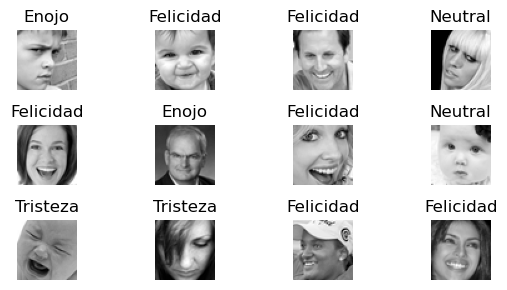

In [33]:
# Mapear las etiquetas numéricas a las emociones
emotion_labels = {
    0: 'Enojo',
    1: 'Disgusto',
    2: 'Miedo',
    3: 'Felicidad',
    4: 'Tristeza',
    5: 'Sorpresa',
    6: 'Neutral'
}

# Seleccionar 12 muestras aleatorias
sample_df = df.sample(n=12, random_state=1)  # Puedes cambiar el random_state para obtener diferentes muestras

# Configurar la figura
fig, axes = plt.subplots(3, 4, figsize=(6,3))
axes = axes.flatten()

for i, (index, row) in enumerate(sample_df.iterrows()):
    # Convertir los píxeles de string a una matriz de 48x48
    pixels = np.array(row['pixels'].split(), dtype='float32')
    pixels = pixels.reshape(48, 48)

    # Obtener la etiqueta de la emoción
    emotion = emotion_labels[row['emotion']]

    # Mostrar la imagen
    axes[i].imshow(pixels, cmap='gray')
    axes[i].set_title(emotion)
    axes[i].axis('off')

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.show()

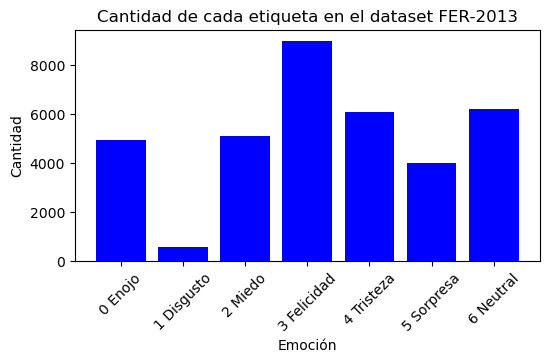

In [34]:
# Crear una nueva columna con las etiquetas de emociones
df['emotion_label'] = df['emotion'].map(emotion_labels)

# Verificar si la columna 'emotion_label' se creó correctamente
if df['emotion_label'].isnull().any():
    raise ValueError("Algunas etiquetas no se mapearon correctamente a emociones")

# Contar la cantidad de cada etiqueta y ordenar por la categoría numérica
emotion_counts = df['emotion'].value_counts().sort_index().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Crear las etiquetas del eje x con el formato "0 Enojo", "1 Disgusto", etc.
emotion_counts['Emotion_Label'] = emotion_counts['Emotion'].map(lambda x: f"{x} {emotion_labels[x]}")

# Crear el gráfico de barras usando matplotlib
plt.figure(figsize=(6,3))
plt.bar(emotion_counts['Emotion_Label'], emotion_counts['Count'],color='blue')

# Añadir título y etiquetas
plt.title('Cantidad de cada etiqueta en el dataset FER-2013')
plt.xlabel('Emoción')
plt.ylabel('Cantidad')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# 3) PREPROCESAMIENTO DE LOS DATOS

In [35]:
#eliminamos las columnas que usamos como aux para gráfico
#df.drop(columns=["emotion_label",'actual_emotion'], inplace=True)
df.head()

,emotion,pixels,Usage,emotion_label
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Enojo
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Enojo
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Miedo
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Tristeza
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral


In [36]:

pixel_list = df['pixels'].to_list()

Arr = []
for pix in pixel_list:
    img = [int(pixel) for pixel in pix.split(' ')]
    img = np.asarray(img).reshape(48, 48)
    Arr.append(img.astype('float32') / 255.0)

#Se itera sobre la lista de píxeles de cada imagen y se convierte en un array de píxeles. Luego, se reformatea el array de píxeles en una matriz 2D de 48x48
#para representar la imagen. Además, se normalizan los valores de los píxeles dividiéndolos por 255.0 para escalarlos al rango [0, 1]"""

X = np.array(Arr)
X = np.expand_dims(X, -1)

y = df['emotion'].values

print(X.shape)
print(y.shape)

#Se construye una lista Arr que contiene todas las imágenes preprocesadas. Luego, esta lista se convierte en un array NumPy y
#se expande una dimensión adicional al final del array (np.expand_dims(X, -1))
#para que tenga la forma correcta (número_de_muestras, altura, ancho, canales) requerida por los modelos de CNN.

In [38]:
#dividimos en train/test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
print(x_train.shape)
print(y_train.shape)


(28709, 48, 48, 1)
(28709,)


# 4) MODELADO

## Resumen del Modelo 1
* Capas del Modelo
* Capas Convolucionales: 3 capas
* Capas de Pooling: 2 capas
* Capas Flatten: 1 capa
* Capas Densas: 2 capas
* Capas de Normalización por Lotes: 1 capa
* Capas de Dropout: 3 capas
* Capa de Salida: 1 capa, 7 neuronas (para 7 clases), activación oftmax

* Hiperparámetros y Configuración
* Optimizador: Adam
* Learning rate: 0.0001
* Función de Pérdida: Sparse Categorical Crossentropy
* Métricas: Accura20
* Épocas: 30
* Batch Size: 128
* Early Stopping: Sí
* Monitor: 'val_accuracy'
* Paciencia: 5 épocas
* Restaura mejores pesos: Sí


In [39]:
# Define the CNN model
model = Sequential(name="CNN_model")

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer to prevent overfitting
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense (fully connected) layers with batch normalization and dropout
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())  # Batch normalization layer
model.add(layers.Dropout(0.5))  # Dropout layer
model.add(layers.Dense(7, activation='softmax'))  # Output layer with 7 classes

# Compile the model with suitable loss function and optimizer

optimizer = Adam(learning_rate=0.0001)  # Use Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "CNN_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 12, 64)        0 

## ENTRENAR MODELO 1

In [40]:
# Fit the CNN model on the training set
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1)  # Use 10% of training data as validation


Epoch 1/20
202/202 [==============================] - 19s 82ms/step - loss: 1.9700 - accuracy: 0.2169 - val_loss: 1.8962 - val_accuracy: 0.2424
Epoch 2/20
202/202 [==============================] - 12s 61ms/step - loss: 1.7759 - accuracy: 0.3226 - val_loss: 1.7996 - val_accuracy: 0.3243
Epoch 3/20
202/202 [==============================] - 12s 61ms/step - loss: 1.6595 - accuracy: 0.3780 - val_loss: 1.6432 - val_accuracy: 0.4037
Epoch 4/20
202/202 [==============================] - 12s 60ms/step - loss: 1.5812 - accuracy: 0.4018 - val_loss: 1.5326 - val_accuracy: 0.4246
Epoch 5/20
202/202 [==============================] - 12s 59ms/step - loss: 1.5179 - accuracy: 0.4293 - val_loss: 1.4729 - val_accuracy: 0.4486
Epoch 6/20
202/202 [==============================] - 12s 61ms/step - loss: 1.4688 - accuracy: 0.4462 - val_loss: 1.4494 - val_accuracy: 0.4521
Epoch 7/20
202/202 [==============================] - 12s 61ms/step - loss: 1.4300 - accuracy: 0.4596 - val_loss: 1.3911 - val_accuracy:

# 5) EVALUACIÓN

In [41]:
# Evaluate the CNN model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Save the accuracy result in a variable
model_accuracy = test_accuracy


225/225 [==============================] - 1s 3ms/step - loss: 1.2418 - accuracy: 0.5298
Test Loss: 1.241763949394226
Test Accuracy: 0.529813289642334


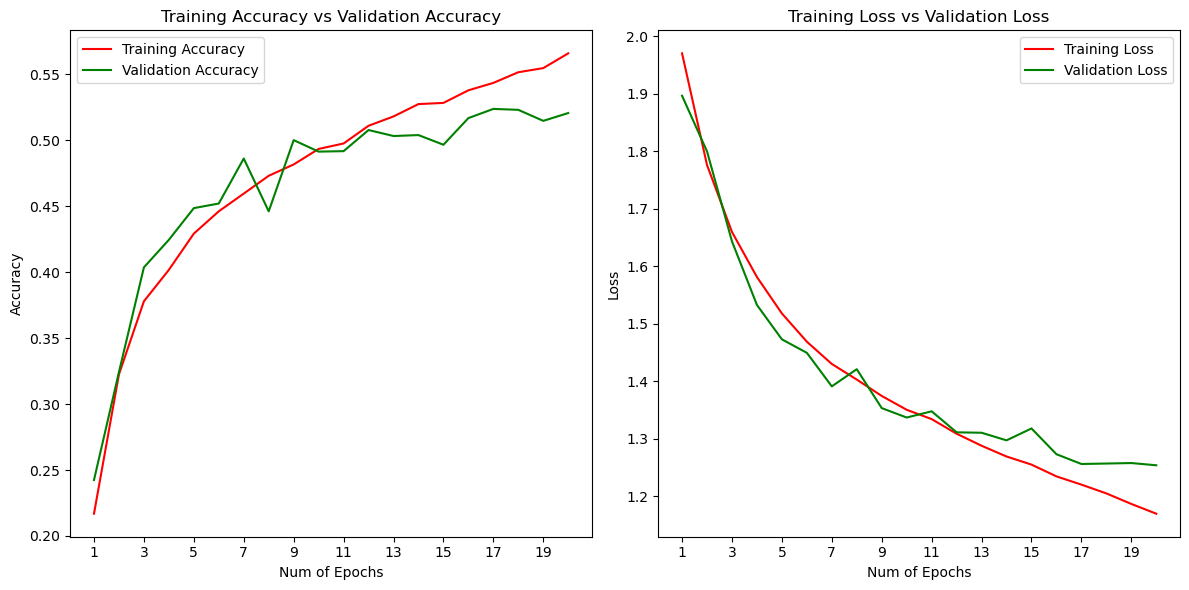

In [42]:
plt.figure(figsize=(12, 6))

# Gráfico de Accuracy
plt.subplot(1, 2, 1)  # Crear el primer subgráfico en una fila de dos
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], 'r', label='Training Accuracy')
# Graficar la precisión en entrenamiento en rojo
plt.plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], 'g', label='Validation Accuracy')
# Graficar la precisión en validación en verde
plt.xticks(np.arange(1, len(history.history['accuracy']) + 1, 2))  # Establecer marcas en el eje x cada dos épocas
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend()

# Gráfico de Loss
plt.subplot(1, 2, 2)  # Crear el segundo subgráfico en una fila de dos
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], 'r', label='Training Loss')
# Graficar la pérdida en entrenamiento en rojo
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], 'g', label='Validation Loss')
# Graficar la pérdida en validación en verde
plt.xticks(np.arange(1, len(history.history['loss']) + 1, 2))  # Establecer marcas en el eje x cada dos épocas
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend()

plt.tight_layout()  # Ajustar el diseño de los subgráficos para mejorar la legibilidad
plt.show()  # Mostrar los gráficos

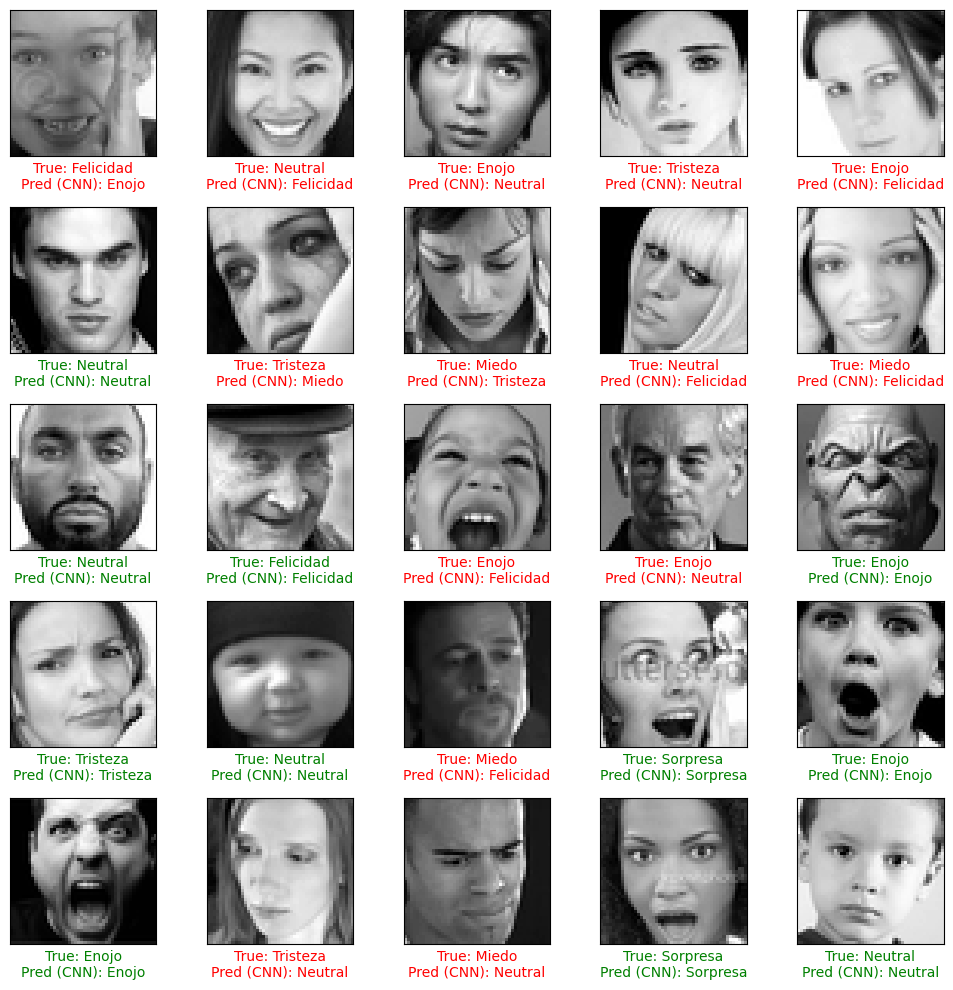

In [43]:
# Get predictions for the test set
predictions_cnn = model.predict(x_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')  # Specify 'gray' colormap
    true_label = emotion_labels[y_test[i]]  # Get true label directly
    predicted_label = emotion_labels[predicted_labels_cnn[i]]  # Get predicted label
    if true_label == predicted_label:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()



# MODELO 2B


## Resumen del Modelo modelo2b
* Capas del Modelo  
* Capas Convolucionales: 5 capas  
* Capas de Pooling: 3 capas  
* Capas Flatten: 1 capa  
* Capas Densas: 2 capas  
* Capas de Normalización por Lotes: 2 capas  
* Capas de Dropout: 4 capas  
* Capa de Salida: 1 capa, 7 neuronas (para 7 clases), activación softmax  
* Hiperparámetros y Configuración  
* Optimizador: Adam  
* Learning rate: 0.0001  
* Función de Pérdida: Categorical Crossentropy
* Métricas: Accuracy
* Épocas: 30
* Batch Size: 128
* Early Stopping: Sí. (Monitor: 'val_accuracy', Paciencia: 5 épocas)

In [44]:
# Convertir etiquetas a one-hot encoding
y = to_categorical(df['emotion'], num_classes=7)
# La función to_categorical convierte las etiquetas de las emociones en formato numérico a formato one-hot, 
#lo que es necesario para el entrenamiento de un modelo de clasificación multiclase.

# Convertir los píxeles en una lista de imágenes
pixel_list = df['pixels'].to_list()
arr = []
for pix in pixel_list:
    img = [int(pixel) for pixel in pix.split(' ')]
    img = np.asarray(img).reshape(48, 48)
    arr.append(img.astype('float32') / 255.0)
# Se convierten los píxeles de las imágenes, que están en formato de cadena, en una lista de imágenes NumPy. 
#Cada imagen se convierte en una matriz NumPy y se normaliza dividiendo por 255.0 para escalar los valores de píxeles al rango [0, 1].

X = np.array(arr)
X = np.expand_dims(X, -1)

print(X.shape)
print(y.shape)

# Dividir en train/test
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
# Se dividen los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split de scikit-learn. Se reserva el 20% de los datos para el conjunto de validación y el 80% restante se utiliza para el entrenamiento del modelo.


(35887, 48, 48, 1)
(35887, 7)
(28709, 48, 48, 1)
(28709, 7)


In [45]:
# Definir el modelo CNN (modelo2b)
modelo2b = Sequential(name="Improved_CNN_model")

# Capas convolucionales y de pooling
modelo2b.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
modelo2b.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelo2b.add(MaxPooling2D((2, 2)))
modelo2b.add(Dropout(0.25))

modelo2b.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelo2b.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelo2b.add(MaxPooling2D((2, 2)))
modelo2b.add(Dropout(0.25))

# Capa convolucional adicional
modelo2b.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
modelo2b.add(MaxPooling2D((2, 2)))
modelo2b.add(Dropout(0.25))

# Capas Flatten y Dense
modelo2b.add(Flatten())
modelo2b.add(Dense(512, activation='relu'))
modelo2b.add(BatchNormalization())
modelo2b.add(Dropout(0.5))

modelo2b.add(Dense(256, activation='relu'))
modelo2b.add(BatchNormalization())
modelo2b.add(Dropout(0.5))

# Capa de salida
modelo2b.add(Dense(7, activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.0001)
modelo2b.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Resumen del modelo
modelo2b.summary()

Model: "Improved_CNN_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 48, 48, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 256)

## ENTRENAR MODELO 2

In [46]:
# Entrenar el modelo
history2b = modelo2b.fit(
    x_train, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/30
225/225 [==============================] - 25s 105ms/step - loss: 2.8456 - accuracy: 0.1693 - val_loss: 1.8367 - val_accuracy: 0.2509
Epoch 2/30
225/225 [==============================] - 22s 100ms/step - loss: 2.4792 - accuracy: 0.2091 - val_loss: 1.7952 - val_accuracy: 0.2878
Epoch 3/30
225/225 [==============================] - 22s 97ms/step - loss: 2.2492 - accuracy: 0.2685 - val_loss: 1.7061 - val_accuracy: 0.3398
Epoch 4/30
225/225 [==============================] - 22s 97ms/step - loss: 2.0715 - accuracy: 0.3091 - val_loss: 1.6928 - val_accuracy: 0.3461
Epoch 5/30
225/225 [==============================] - 22s 97ms/step - loss: 1.9214 - accuracy: 0.3419 - val_loss: 1.6935 - val_accuracy: 0.3816
Epoch 6/30
225/225 [==============================] - 22s 97ms/step - loss: 1.7852 - accuracy: 0.3778 - val_loss: 1.5049 - val_accuracy: 0.4217
Epoch 7/30
225/225 [==============================] - 22s 97ms/step - loss: 1.6848 - accuracy: 0.4007 - val_loss: 1.5041 - val_accurac

In [47]:
# Evaluación del modelo en el conjunto de validación
val_loss, model2b_accuracy = modelo2b.evaluate(x_val, y_val)
print(f"Precisión en el conjunto de validación: {model2b_accuracy:.2f}")
# Guardar la precisión en una variable
model2b_accuracy_variable = model2b_accuracy

225/225 [==============================] - 2s 9ms/step - loss: 1.0684 - accuracy: 0.6169
Precisión en el conjunto de validación: 0.62


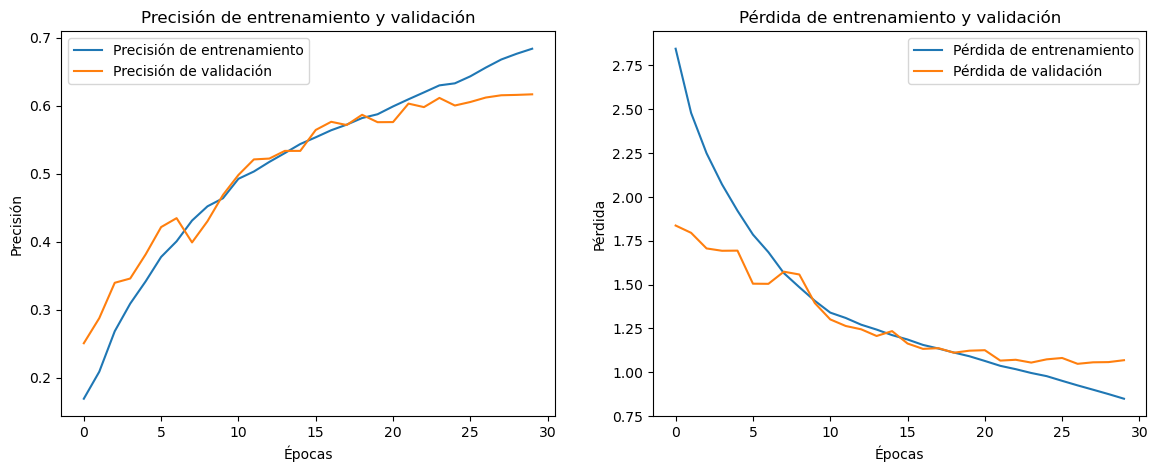

La precisión del modelo es adecuada para un primer intento, pero puede mejorarse con más datos o ajuste de hiperparámetros.


In [48]:
# Graficar precisión y pérdida
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history2b.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history2b.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión de entrenamiento y validación')

plt.subplot(1, 2, 2)
plt.plot(history2b.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history2b.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida de entrenamiento y validación')

plt.show()

# Resumen de precisión
if model2b_accuracy >= 0.60:
    print("La precisión del modelo es adecuada para un primer intento, pero puede mejorarse con más datos o ajuste de hiperparámetros.")
else:
    print("La precisión del modelo es baja y debe mejorarse. Considere más datos, ajuste de hiperparámetros, o diferentes arquitecturas.")


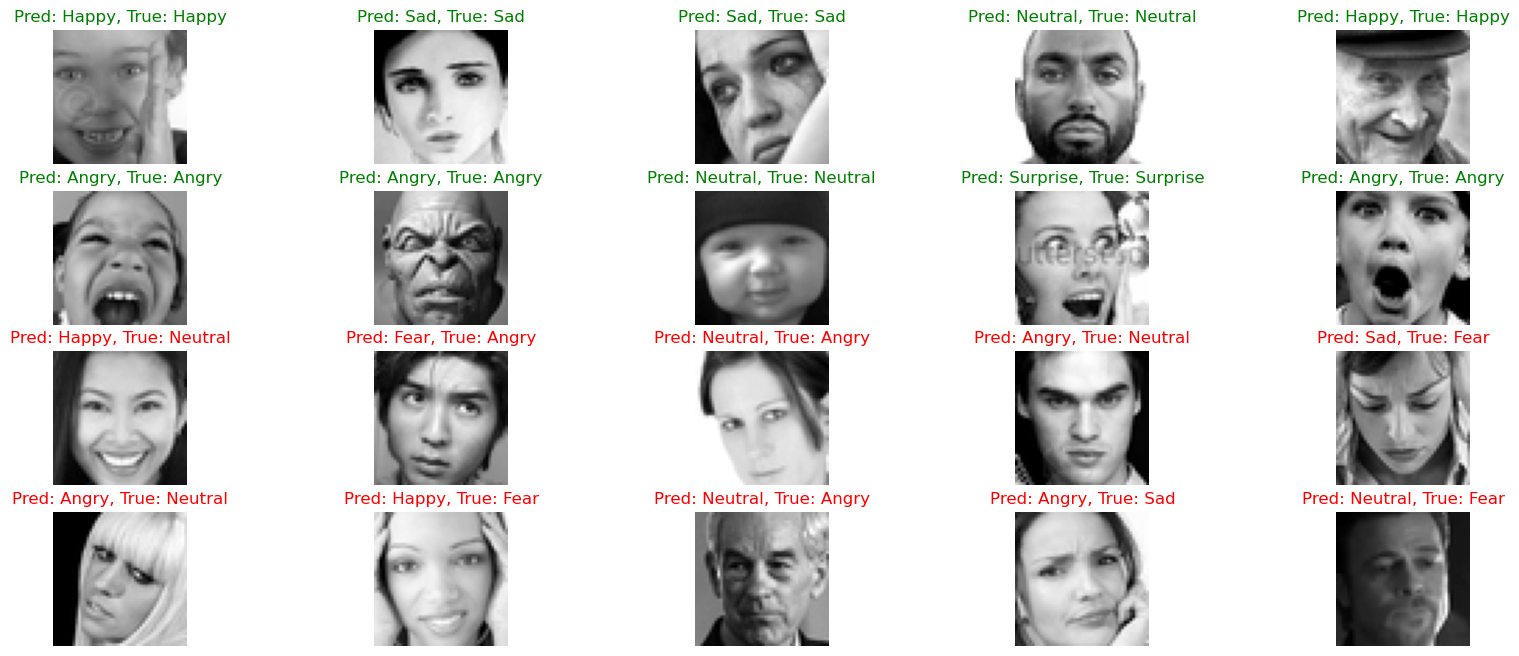

In [49]:
# Función para mostrar imágenes clasificadas correctamente e incorrectamente
def plot_classification_results(modelo2b, x_val, y_val, num_examples=10):
    emotion_labels = {
        0: "Angry",
        1: "Disgust",
        2: "Fear",
        3: "Happy",
        4: "Sad",
        5: "Surprise",
        6: "Neutral"
    }

    predictions = modelo2b.predict(x_val)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Convertir y_val a índices si está en formato one-hot
    if y_val.ndim == 2:
        true_classes = np.argmax(y_val, axis=1)
    else:
        true_classes = y_val

    correct_indices = np.where(predicted_classes == true_classes)[0]
    incorrect_indices = np.where(predicted_classes != true_classes)[0]

    plt.figure(figsize=(20, 8))

    for i, correct in enumerate(correct_indices[:num_examples]):
        plt.subplot(4, num_examples // 2, i + 1)
        plt.imshow(x_val[correct].reshape(48, 48), cmap='gray')
        plt.title(f"Pred: {emotion_labels[predicted_classes[correct]]}, True: {emotion_labels[true_classes[correct]]}", color='green')
        plt.axis('off')

    for i, incorrect in enumerate(incorrect_indices[:num_examples]):
        plt.subplot(4, num_examples // 2, i + 1 + num_examples)
        plt.imshow(x_val[incorrect].reshape(48, 48), cmap='gray')
        plt.title(f"Pred: {emotion_labels[predicted_classes[incorrect]]}, True: {emotion_labels[true_classes[incorrect]]}", color='red')
        plt.axis('off')

    plt.show()

# Mostrar ejemplos de clasificaciones correctas e incorrectas
plot_classification_results(modelo2b, x_val, y_val)


# MODELO 3

## Resumen del Modelo 3

* Capas del Modelo
  * Capas Convolucionales: 6 capas
  * Capas de Pooling: 4 capas
  * Capas Flatten: 1 capa
  * Capas Densas: 2 capas
  * Capas de Normalización por Lotes: 2 capas
  * Capas de Dropout: 5 capas
  * Capa de Salida: 1 capa, 7 neuronas (para 7 clases), activación softmax
* Hiperparámetros y Configuración
  * Learning rate:0,001
  * Optimizador: Adam
  * Función de Pérdida: Categorical Crossentropy
  * Métricas: Accuracy
  * Épocas: 30
  * Batch Size: 128
  * Early Stopping: Sí. (Monitor: 'val_accuracy', Paciencia: 10 épocas)
  * Data Augmentation: Sí

In [50]:
# Definir el modelo CNN (modelo3)
modelo3 = Sequential(name="CNN_model3")

# Capas convolucionales y de pooling
modelo3.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
modelo3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelo3.add(MaxPooling2D((2, 2)))
modelo3.add(Dropout(0.25))

modelo3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modelo3.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
modelo3.add(MaxPooling2D((2, 2)))
modelo3.add(Dropout(0.25))

# Capa convolucional adicional (se agregaron 2 capas convolucionales adicionales)
modelo3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
modelo3.add(MaxPooling2D((2, 2)))
modelo3.add(Dropout(0.25))

modelo3.add(Conv2D(512, (3, 3), activation='relu', padding='same'))  # Nueva capa convolucional
modelo3.add(MaxPooling2D((2, 2)))  # Nueva capa de pooling
modelo3.add(Dropout(0.25))  # Nueva capa de dropout

# Capas Flatten y Dense
modelo3.add(Flatten())
modelo3.add(Dense(512, activation='relu'))
modelo3.add(BatchNormalization())
modelo3.add(Dropout(0.5))

modelo3.add(Dense(256, activation='relu'))
modelo3.add(BatchNormalization())
modelo3.add(Dropout(0.5))

# Capa de salida
modelo3.add(Dense(7, activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
modelo3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    # Rango de rotación en grados. Las imágenes pueden rotarse aleatoriamente en el rango especificado.

    width_shift_range=0.1,
    # Rango de desplazamiento horizontal fraccionario. La fracción del ancho total por la que se puede desplazar 
    #la imagen horizontalmente aleatoriamente.

    height_shift_range=0.1,
    # Rango de desplazamiento vertical fraccionario. La fracción de la altura total por la que se puede 
    # desplazar la imagen verticalmente aleatoriamente.

    shear_range=0.1,
    # Rango de cizallamiento (shear). El ángulo en sentido horario (en radianes) dentro del cual se puede aplicar el cizallamiento aleatorio.

    zoom_range=0.1,
    # Rango de zoom aleatorio. La fracción por la que se puede aumentar o disminuir aleatoriamente la imagen.

    horizontal_flip=True,
    # Booleano. Si se deben realizar volteos horizontales aleatorios de las imágenes.

)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)


# Resumen del modelo
modelo3.summary()

Model: "CNN_model3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 48, 48, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 256)       0

## ENTRENAR MODELO 3

In [51]:
# Entrenar el modelo con data augmentation
history3 = modelo3.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=30,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/30
225/225 [==============================] - 85s 373ms/step - loss: 2.3587 - accuracy: 0.1883 - val_loss: 2.7115 - val_accuracy: 0.1576
Epoch 2/30
225/225 [==============================] - 26s 116ms/step - loss: 1.9418 - accuracy: 0.2238 - val_loss: 1.7958 - val_accuracy: 0.2653
Epoch 3/30
225/225 [==============================] - 27s 118ms/step - loss: 1.8308 - accuracy: 0.2503 - val_loss: 3.2857 - val_accuracy: 0.1198
Epoch 4/30
225/225 [==============================] - 26s 115ms/step - loss: 1.7909 - accuracy: 0.2654 - val_loss: 1.9490 - val_accuracy: 0.2692
Epoch 5/30
225/225 [==============================] - 26s 114ms/step - loss: 1.6732 - accuracy: 0.3346 - val_loss: 1.7708 - val_accuracy: 0.3497
Epoch 6/30
225/225 [==============================] - 26s 115ms/step - loss: 1.5067 - accuracy: 0.4145 - val_loss: 1.4870 - val_accuracy: 0.4178
Epoch 7/30
225/225 [==============================] - 26s 115ms/step - loss: 1.4033 - accuracy: 0.4603 - val_loss: 1.4246 - val_ac

225/225 [==============================] - 2s 10ms/step - loss: 0.9686 - accuracy: 0.6468
Precisión en el conjunto de validación del modelo3: 0.65



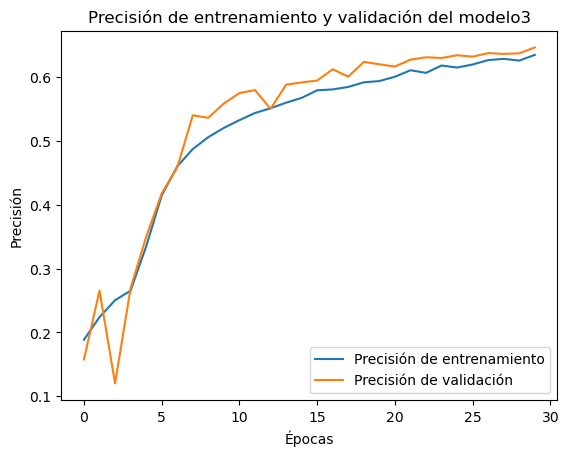

In [52]:
# Evaluación del modelo en el conjunto de validación
val_loss, model3_accuracy = modelo3.evaluate(x_val, y_val)
print(f"Precisión en el conjunto de validación del modelo3: {model3_accuracy:.2f}")
print()

# Guardar la precisión en una variable
model3_accuracy_variable = model3_accuracy

# Gráfico de resultados
plt.plot(history3.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history3.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión de entrenamiento y validación del modelo3')
plt.show()

# RESUMEN COMPARATIVO DE MODELOS

## CAMBIOS REALIZADOS - MODELO 2B:
* El optimizador se mantiene Adam.
* En el segundo modelo se pasó de 3 a 5 capas convolucionales. Con misma cantidad de capas densas. 
* El batchsize se mantuvo en 128.
* La cantidad de épocas pasó de 20 a 30.
* En el segundo modelo se agregó early stopping.
* Función de pérdida: Categorical Crossentropy.
* Learning rate: sigue en 0.0001.


## CAMBIOS REALIZADOS - MODELO 3:
* Se pasó de 5 a 6 capas convolusionales. Con misma cantidad de capas densas.
* Se agregó data augmentation
* Patience en early stopping a 10.
* Learning rate a 0.001.Este valor de learning rate es mayor y permite ajustes más grandes en los pesos de la red en cada paso de optimización.

# CONCLUSIONES

* Como se observa en el gráfico a continuación, a medida que fuimos ajustando el modelo, los resultados mejoraron.
* En el tercer modelo se obtuvo la métrica más alta. Este modelo contó con mayor cantidad de capas convolucionales, uso de data augmentation y un valor más alto de learning rate.
* En los gráficos de error de entrenamiento y validación, observamos que las curvas de error se mantienen más cercanas entre sí a lo largo de las épocas. Esta menor divergencia indica que el Modelo 3 tiene una menor tendencia al overfitting, sugiriendo que ha aprendido las características relevantes de los datos sin ajustarse demasiado al ruido presente en el conjunto de entrenamiento.
* Para seguir mejorando nuestro modelo y obtener una comprensión más profunda de su desempeño, en un próximo paso, desarrollaremos y probaremos una arquitectura distinta. Este nuevo enfoque nos permitirá comparar métricas y evaluar si podemos lograr un mejor balance entre precisión y capacidad de generalización. Al experimentar con diferentes arquitecturas, buscamos identificar la configuración óptima que minimice el overfitting y maximice la eficiencia del modelo.

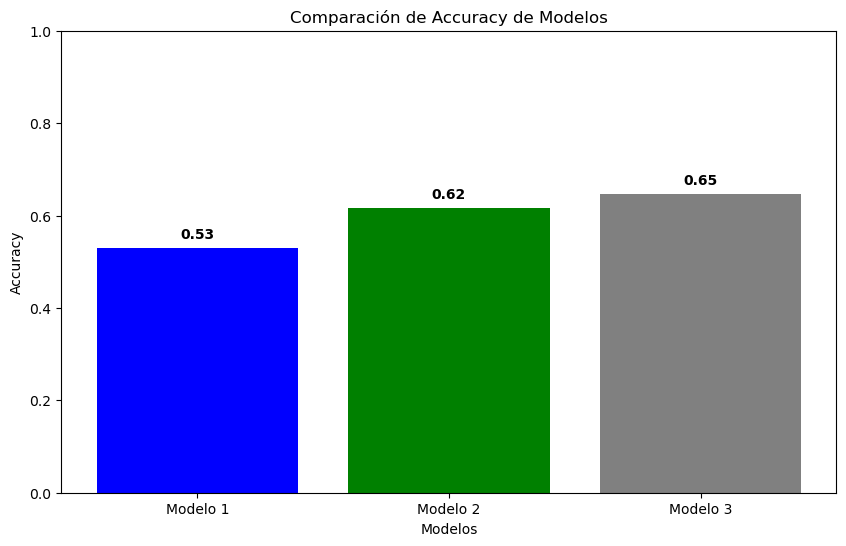

In [54]:
accuracy_modelo1=model_accuracy
accuracy_modelo2=model2b_accuracy_variable
accuracy_modelo3=model3_accuracy_variable


# Nombres de los modelos
model_names = ['Modelo 1', 'Modelo 2', 'Modelo 3']
accuracies = [accuracy_modelo1, accuracy_modelo2, accuracy_modelo3]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'grey'])

# Añadir títulos y etiquetas
plt.title('Comparación de Accuracy de Modelos')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Asegura que el eje y va de 0 a 1

# Añadir valores de accuracy encima de las barras
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

# Mostrar el gráfico
plt.show()